In [2]:
from preprocessing import make_dataframes
from PIL import Image
import config
import utils

In [1]:
import torch
import torch.nn as nn

import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import data_loader
import metrics
import config
from torch.utils.data import DataLoader
from tqdm import tqdm
from metrics import F1ScoreCrossEntropyLoss

# LeNet model for RGB images
class LeNet(nn.Module):
    def __init__(self, num_classes=2):
        super(LeNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1),
            nn.Dropout2d(0.2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=5, stride=1),
            nn.Dropout2d(0.2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=5, stride=1),
            nn.Dropout2d(0.2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=5, stride=1),
            nn.Dropout2d(0.2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(2048, 120),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(84, num_classes)
        )

        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# class_weights = torch.tensor([1.0, 3])
# criterion = F1ScoreCrossEntropyLoss()
# cross = nn.CrossEntropyLoss()
# model = LeNet(num_classes=2).to(config.DEVICE)
# x = torch.randn(64,3,128,128).to(config.DEVICE)
# y = torch.randint(low=0,high=2,size=(64,)).to(config.DEVICE)
# pred = model(x)
# criterion(pred,y)

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from train import fit
from metrics import F1ScoreCrossEntropyLoss

num_epochs = 30
model = LeNet(num_classes=2).to(config.DEVICE)
class_weights = torch.tensor([1.0, 2.0]).to(config.DEVICE)
criterion = F1ScoreCrossEntropyLoss(weight=class_weights)
# criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_loader , val_loader , test_loader = data_loader.create_dataloader(None,None,None)
train_losses,val_losses,val_accuracies,val_f1_scores = fit(model,criterion,optimizer,train_loader,val_loader,test_loader,num_epochs=num_epochs,log_file=config.LOGFILE,save_dir='log/')  

100%|██████████| 10/10 [00:01<00:00,  5.93it/s]


Epoch 1 | train_loss: 0.476 | val_loss: 0.310 | val_acc: 0.913 | f1_score: 0.877


100%|██████████| 10/10 [00:02<00:00,  4.60it/s]


Epoch 2 | train_loss: 0.296 | val_loss: 0.235 | val_acc: 0.952 | f1_score: 0.926


100%|██████████| 10/10 [00:01<00:00,  6.36it/s]


Epoch 3 | train_loss: 0.263 | val_loss: 0.210 | val_acc: 0.945 | f1_score: 0.919


100%|██████████| 10/10 [00:01<00:00,  6.12it/s]


Epoch 4 | train_loss: 0.245 | val_loss: 0.214 | val_acc: 0.953 | f1_score: 0.928


100%|██████████| 10/10 [00:01<00:00,  6.19it/s]


Epoch 5 | train_loss: 0.248 | val_loss: 0.200 | val_acc: 0.935 | f1_score: 0.907


100%|██████████| 10/10 [00:02<00:00,  4.66it/s]


Epoch 6 | train_loss: 0.204 | val_loss: 0.199 | val_acc: 0.948 | f1_score: 0.922


100%|██████████| 10/10 [00:01<00:00,  6.05it/s]


Epoch 7 | train_loss: 0.200 | val_loss: 0.164 | val_acc: 0.952 | f1_score: 0.927


100%|██████████| 10/10 [00:01<00:00,  6.07it/s]


Epoch 8 | train_loss: 0.202 | val_loss: 0.150 | val_acc: 0.962 | f1_score: 0.942


100%|██████████| 10/10 [00:01<00:00,  5.36it/s]


Epoch 9 | train_loss: 0.189 | val_loss: 0.132 | val_acc: 0.965 | f1_score: 0.948


100%|██████████| 10/10 [00:01<00:00,  5.59it/s]


Epoch 10 | train_loss: 0.156 | val_loss: 0.154 | val_acc: 0.972 | f1_score: 0.956


100%|██████████| 10/10 [00:02<00:00,  4.81it/s]


Epoch 11 | train_loss: 0.154 | val_loss: 0.103 | val_acc: 0.972 | f1_score: 0.957


100%|██████████| 10/10 [00:01<00:00,  6.16it/s]


Epoch 12 | train_loss: 0.156 | val_loss: 0.106 | val_acc: 0.968 | f1_score: 0.952


100%|██████████| 10/10 [00:01<00:00,  6.12it/s]


Epoch 13 | train_loss: 0.160 | val_loss: 0.113 | val_acc: 0.960 | f1_score: 0.941


100%|██████████| 10/10 [00:01<00:00,  5.67it/s]


Epoch 14 | train_loss: 0.158 | val_loss: 0.096 | val_acc: 0.968 | f1_score: 0.953


100%|██████████| 10/10 [00:01<00:00,  6.23it/s]


Epoch 15 | train_loss: 0.128 | val_loss: 0.099 | val_acc: 0.967 | f1_score: 0.950


100%|██████████| 10/10 [00:02<00:00,  4.99it/s]


Epoch 16 | train_loss: 0.127 | val_loss: 0.112 | val_acc: 0.967 | f1_score: 0.950


100%|██████████| 10/10 [00:01<00:00,  5.69it/s]


Epoch 17 | train_loss: 0.126 | val_loss: 0.078 | val_acc: 0.978 | f1_score: 0.968


100%|██████████| 10/10 [00:01<00:00,  6.27it/s]


Epoch 18 | train_loss: 0.116 | val_loss: 0.095 | val_acc: 0.973 | f1_score: 0.960


100%|██████████| 10/10 [00:01<00:00,  5.31it/s]


Epoch 19 | train_loss: 0.126 | val_loss: 0.083 | val_acc: 0.975 | f1_score: 0.963


100%|██████████| 10/10 [00:01<00:00,  5.20it/s]


Epoch 20 | train_loss: 0.106 | val_loss: 0.101 | val_acc: 0.963 | f1_score: 0.946


100%|██████████| 10/10 [00:01<00:00,  5.95it/s]


Epoch 21 | train_loss: 0.102 | val_loss: 0.066 | val_acc: 0.983 | f1_score: 0.975


100%|██████████| 10/10 [00:01<00:00,  5.92it/s]


Epoch 22 | train_loss: 0.095 | val_loss: 0.091 | val_acc: 0.970 | f1_score: 0.955


100%|██████████| 10/10 [00:01<00:00,  5.70it/s]


Epoch 23 | train_loss: 0.104 | val_loss: 0.096 | val_acc: 0.963 | f1_score: 0.946


100%|██████████| 10/10 [00:01<00:00,  5.79it/s]


Epoch 24 | train_loss: 0.097 | val_loss: 0.073 | val_acc: 0.977 | f1_score: 0.965


100%|██████████| 10/10 [00:01<00:00,  6.28it/s]


Epoch 25 | train_loss: 0.085 | val_loss: 0.085 | val_acc: 0.975 | f1_score: 0.963


100%|██████████| 10/10 [00:01<00:00,  6.09it/s]


Epoch 26 | train_loss: 0.081 | val_loss: 0.076 | val_acc: 0.973 | f1_score: 0.961


100%|██████████| 10/10 [00:01<00:00,  6.39it/s]


Epoch 27 | train_loss: 0.099 | val_loss: 0.086 | val_acc: 0.973 | f1_score: 0.961


100%|██████████| 10/10 [00:01<00:00,  6.17it/s]


Epoch 28 | train_loss: 0.086 | val_loss: 0.088 | val_acc: 0.975 | f1_score: 0.963


100%|██████████| 10/10 [00:01<00:00,  5.76it/s]


Epoch 29 | train_loss: 0.094 | val_loss: 0.062 | val_acc: 0.982 | f1_score: 0.972


100%|██████████| 10/10 [00:01<00:00,  6.28it/s]


Epoch 30 | train_loss: 0.097 | val_loss: 0.077 | val_acc: 0.970 | f1_score: 0.956


100%|██████████| 10/10 [00:02<00:00,  4.47it/s]

test_loss: 0.127 | test_acc: 0.972 | f1_score: 0.958
Training completed!


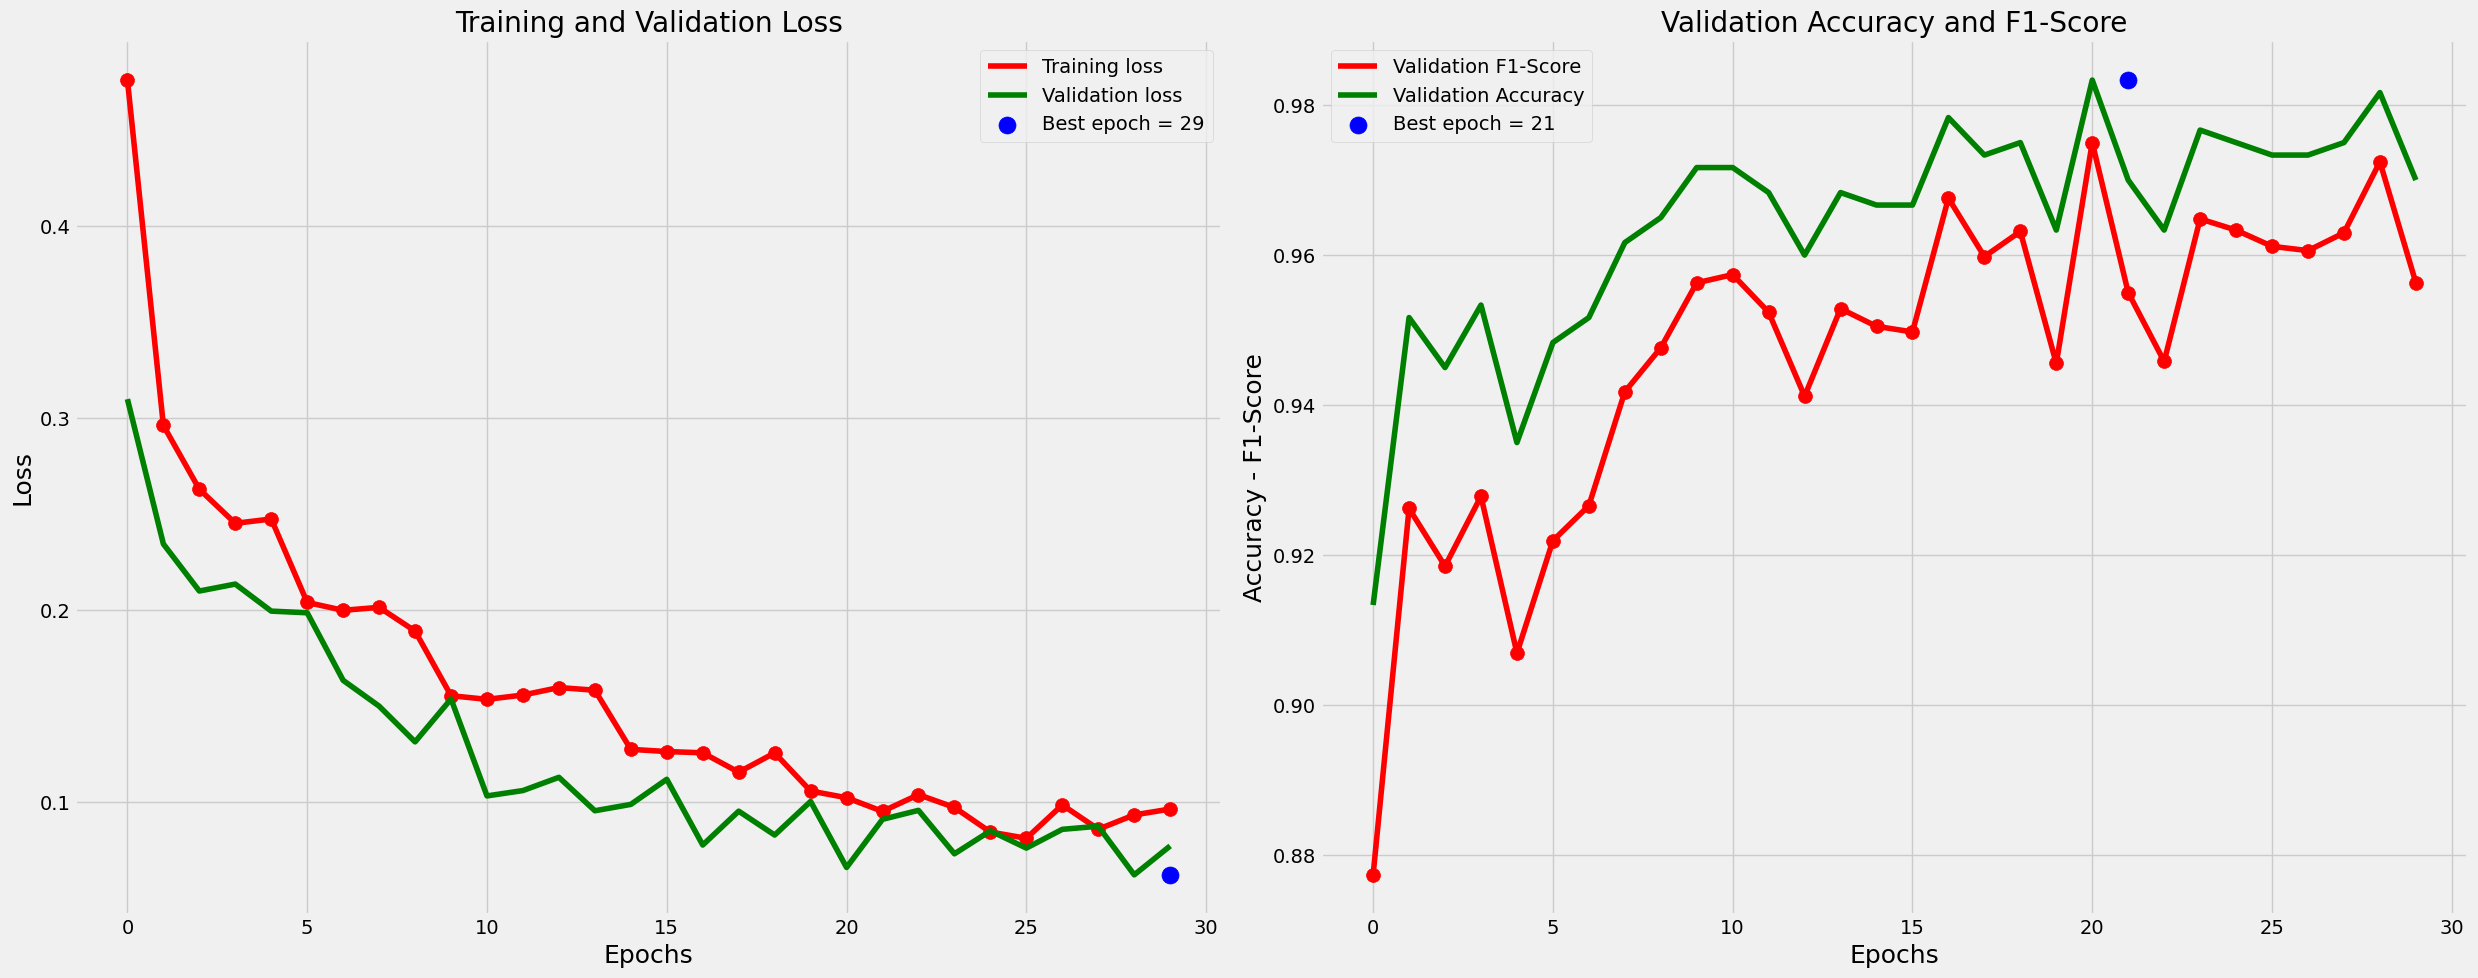

28

In [3]:
import utils
utils.plot_training_results(val_f1_scores,train_losses,val_accuracies,val_losses)

In [4]:
def predict_and_gather_uncorrected(model, data_loader):
    """
    Predict batches of data using the given model and gather incorrect predictions.

    Args:
        model (torch.nn.Module): The trained model.
        data_loader (torch.utils.data.DataLoader): The data loader containing the data to predict.
        config.DEVICE (str): The device to use for inference ('cuda' for GPU or 'cpu').

    Returns:
        list of tuples: A list containing tuples (image, true_label, predicted_label) for incorrect predictions.
    """
    model.eval()
    uncorrected_list = []

    with torch.no_grad():
        for images, true_labels in data_loader:
            images = images.to(config.DEVICE)
            true_labels = true_labels.to(config.DEVICE)

            outputs = model(images)
            _, predicted_labels = torch.max(outputs, 1)

            incorrect_mask = predicted_labels != true_labels
            for idx in range(len(images)):
                if incorrect_mask[idx]:
                    image = images[idx].cpu()  # Move the image to CPU for visualization if needed
                    true_label = true_labels[idx].item()
                    predicted_label = predicted_labels[idx].item()
                    uncorrected_list.append((image, true_label, predicted_label))

    return uncorrected_list

# Example usage:
# Assuming you have a trained model 'model', a data loader 'data_loader', and the config.DEVICE to use 'config.DEVICE' (e.g., 'cuda' or 'cpu').
uncorrected_list = predict_and_gather_uncorrected(model, test_loader)
print(len(uncorrected_list))

17


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

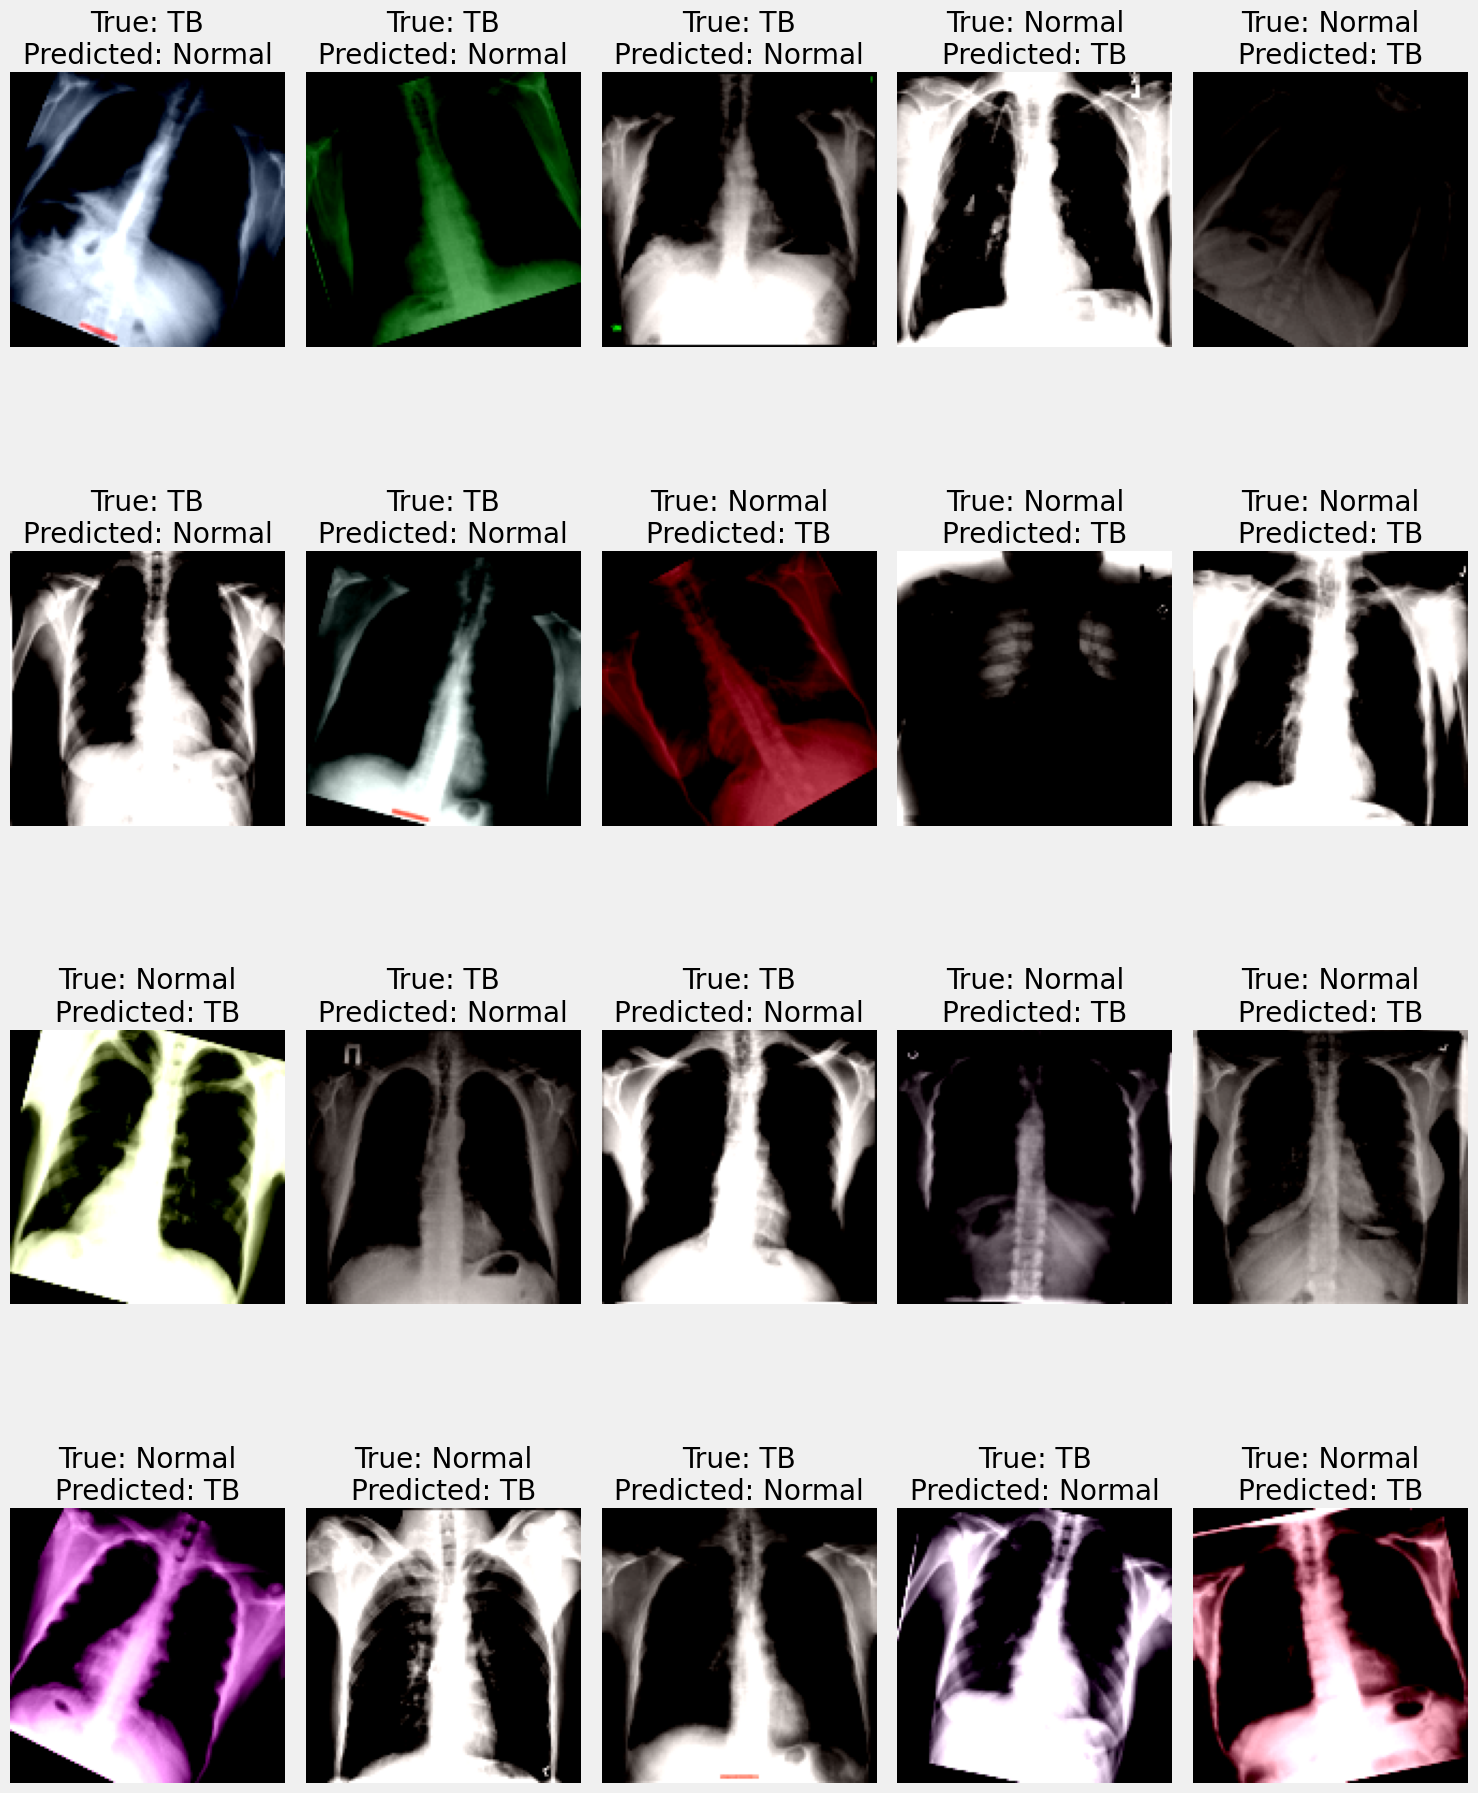

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_incorrect_predictions(uncorrected_list, class_labels):
    """
    Plot the images with their correct and predicted labels for incorrect predictions.

    Args:
        uncorrected_list (list of tuples): List containing tuples (image, true_label, predicted_label)
                                          for incorrect predictions.
        class_labels (dict): Dictionary mapping class indices to class labels.
    """
    num_images = len(uncorrected_list)
    num_rows = (num_images - 1) // 5 + 1
    num_cols = min(num_images, 5)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    for idx, (image, true_label, predicted_label) in enumerate(uncorrected_list):
        true_label = class_labels[true_label]
        predicted_label = class_labels[predicted_label]

        row_idx = idx // 5
        col_idx = idx % 5

        axes[row_idx, col_idx].imshow(image.permute(1, 2, 0))  # Move channels to the last dimension for visualization
        axes[row_idx, col_idx].axis('off')

        axes[row_idx, col_idx].set_title(f'True: {true_label}\nPredicted: {predicted_label}')

    for idx in range(num_images, num_rows * 5):
        row_idx = idx // 5
        col_idx = idx % 5
        fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have 'uncorrected_list' as a list of tuples (image, true_label, predicted_label) from the previous function.
class_labels = {0: 'Normal', 1: 'TB'}  # Replace this with your actual class labels
plot_incorrect_predictions(uncorrected_list, class_labels)


In [19]:
import torch
import torchvision.transforms as transforms
from PIL import Image

def get_mean_std(data_df):
    """
    Calculate the mean and standard deviation of a list of RGB images specified in the DataFrame.

    Args:
        data_df (pd.DataFrame): The DataFrame containing 'filepaths' and 'labels' columns.

    Returns:
        tuple: A tuple containing the mean and standard deviation of the images as (mean, std).
    """
    transform = transforms.Compose([
        transforms.Lambda(lambda x: x.convert('RGB')),
        transforms.Resize((224, 224)),  # Resize images to a common size (optional)
        transforms.ToTensor()  # Convert images to PyTorch tensors
    ])

    images_list = []
    for filepath in tqdm(data_df['filepaths']):
        image = Image.open(filepath)
        image = transform(image)
        images_list.append(image)

    # Convert the list of images to a PyTorch tensor
    images_tensor = torch.stack(images_list)

    # Calculate the mean and standard deviation along each channel (R, G, and B)
    mean = torch.mean(images_tensor, dim=(0, 2, 3))
    std = torch.std(images_tensor, dim=(0, 2, 3))

    return mean, std

# Example usage:
# Assuming you have a DataFrame 'data_df' containing 'filepaths' and 'labels'.
# mean, std = calculate_mean_and_std_from_dataframe(data_df)
# print("Mean:", mean)
# print("Std:", std)
mean , std = get_mean_std(concatenated_df)

100%|██████████| 4200/4200 [00:39<00:00, 105.93it/s]


In [20]:
mean , std

(tensor([0.5013, 0.5097, 0.5125]), tensor([0.2587, 0.2588, 0.2601]))